![title](.\images\DSA-Logo.png)

# <font color='black'>Projeto:</font> <font color='blue'>Prevendo o Nível de Satisfação dos Clientes do Santander.</font>

## <font color='black'>Data:</font> <font color='blue'>Maio, 2020</font>

## <font color='black'>Cientista de Dados:</font> <font color='blue'>Walter Trevisan</font>

## 03- Explore The Data (`Step 04`)

Nesta etapa, vamos continuar a nossa **`Análise Exploratória`** dos dados, utilizando o dataset de treinamento que foi preparado na etapa anterior (**`02-Get-The-Data`**), ou seja, o *data frame* que foi salvo no arquivo **`santander_train.pickle`**.

Então, vamos realizar as seguintes atividades:

1. Carregar o *data frame* de treinamento, salvo no arquivo **`santander_train.pickle`**;


2. Restaurar as informações (objetos) importantes criados e/ou alterados nas etapas **`Step 01`**, **`Step 02`** e **`Step 03`** da nossa análise exploratória;


3. Estudar cada atributo/feature e suas características (entender as informações e os tipos de dados), verificando também possíveis valores ausentes (**`Missing Values = NaN`**) e possíveis **`Outliers`**.


4. Salvar informações (objetos) importantes criados e/ou alterados durante a nossa análise exploratória (**`Step 04`**).

## Setup

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Common imports:
import numpy as np    # NumPy
import pandas as pd   # Pandas

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Importa o pacote "seaborn"
import seaborn as sns

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
PROJECT_ROOT_DIR = "."

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) desta Fase do Projeto:
PROJECT_IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", "03-Explore_The_Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_IMG_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
PROJECT_OBJ_PATH = os.path.join(PROJECT_ROOT_DIR, "Objects")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "Objetos" (Data Frames) do Projeto:
PROJECT_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_DATA_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
PROJECT_LIB_PATH = os.path.join(PROJECT_ROOT_DIR, "Library")

# Adicionando o diretório ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(PROJECT_LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Library_v1_0":
import DataScience_Library_v1_0 as dslib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Plot_Library_v1_0":
import DataScience_Plot_Library_v1_0 as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "DSA_Project_03_Library":
import DSA_Project_03_Library as pjlib

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
%reload_ext watermark
%watermark -a "Walter Trevisan" --iversions

matplotlib 3.2.1
numpy      1.18.2
seaborn    0.10.0
pandas     0.25.3
Walter Trevisan


## 01- Carregando o nosso *data frame* de treinamento: `santander_train.pickle`

In [3]:
# Carregando o objeto (data frame) "santander_train":
train_df = dslib.pickle_object_load(path=PROJECT_DATA_PATH, file="santander_train.pickle",
                                    msg="The 'santander_train' (data frame) has been successfully uploaded!")

The 'santander_train' (data frame) has been successfully uploaded!


In [4]:
# Renomeando o label "ind_var10cte_ult1", em nosso dataset, para colocá-lo no mesmo padrão das outras variáveis (features).
train_df.rename(columns={'ind_var10cte_ult1': 'ind_var10_cte_ult1'}, inplace=True)

## 02 - Restaurando informações (`objetos`) importantes que serão utilizados nesta etapa:

Primeiro, vamos restaurar/carregar os seguintes `objetos` importantes que serão utilizados nesta etapa da `Análise Exploratória`:

1. **`feat_groupby_vars`:** dicionário com as features agrupadas por tipo de variável (var1, var2, var18, etc...);

2. **`vars_groupby_featcount`:** dicionário com as variáveis (var1, var2, var18, etc...) agrupadas por quantidade (contagem) de features (Feat_1, Feat_2, Feat_3, etc...);

3. **`santander_feat_info`:** dicionário com as principais informações sobre cada uma das features, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`) e uma lista das variáveis que não são importantes para a criação dos modelos preditivos (`Drop`).

In [5]:
# Carregando o objeto "feat_groupby_vars":
feat_groupby_vars = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="feat_groupby_vars.pickle",
                                             msg="The 'feat_groupby_vars' object has been successfully uploaded!")

# Carregando o objeto "vars_groupby_featcount":
vars_groupby_featcount = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="vars_groupby_featcount.pickle",
                                                  msg="The 'vars_groupby_featcount' object has been successfully uploaded!")

# Carregando o objeto "santander_feat_info":
santander_feat_info = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="santander_feat_info.pickle",
                                               msg="The 'santander_feat_info' object has been successfully uploaded!")

The 'feat_groupby_vars' object has been successfully uploaded!
The 'vars_groupby_featcount' object has been successfully uploaded!
The 'santander_feat_info' object has been successfully uploaded!


## 03- Entendendo as informações e os tipos de dados de cada atributo (`Feature`):

## Variáveis que possuem `18 features` em nosso dataset:

In [6]:
# Verificando as variáveis que possuem "18" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_18']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 3
['var39', 'var40', 'var41']


In [7]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 54


## var39

In [8]:
# Resumo das informações:
train_df[feat_groupby_vars['var39']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 18 columns):
imp_op_var39_comer_ult1     60816 non-null float64
imp_op_var39_comer_ult3     60816 non-null float64
imp_op_var39_efect_ult1     60816 non-null float64
imp_op_var39_efect_ult3     60816 non-null float64
imp_op_var39_ult1           60816 non-null float64
ind_var39                   60816 non-null int64
ind_var39_0                 60816 non-null int64
num_meses_var39_vig_ult3    60816 non-null int64
num_op_var39_comer_ult1     60816 non-null int64
num_op_var39_comer_ult3     60816 non-null int64
num_op_var39_efect_ult1     60816 non-null int64
num_op_var39_efect_ult3     60816 non-null int64
num_op_var39_hace2          60816 non-null int64
num_op_var39_hace3          60816 non-null int64
num_op_var39_ult1           60816 non-null int64
num_op_var39_ult3           60816 non-null int64
num_var39                   60816 non-null int64
num_var39_0                 60816 non-null int64

Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [9]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var39']].describe().T

,count,mean,std,min,25%,50%,75%,max
imp_op_var39_comer_ult1,60816.0,72.185307,338.049064,0.0,0.0,0.0,0.0,9968.04
imp_op_var39_comer_ult3,60816.0,119.169036,544.262724,0.0,0.0,0.0,0.0,16086.06
imp_op_var39_efect_ult1,60816.0,68.113121,530.960400,0.0,0.0,0.0,0.0,45990.00
imp_op_var39_efect_ult3,60816.0,112.362815,853.740784,0.0,0.0,0.0,0.0,96870.00
imp_op_var39_ult1,60816.0,140.243896,715.611960,0.0,0.0,0.0,0.0,47598.09
ind_var39,60816.0,0.003535,0.059353,0.0,0.0,0.0,0.0,1.00
ind_var39_0,60816.0,0.880673,0.324176,0.0,1.0,1.0,1.0,1.00
num_meses_var39_vig_ult3,60816.0,1.591769,0.719764,0.0,1.0,2.0,2.0,3.00
num_op_var39_comer_ult1,60816.0,2.198944,9.225778,0.0,0.0,0.0,0.0,438.00
num_op_var39_comer_ult3,60816.0,3.608573,15.001526,0.0,0.0,0.0,0.0,600.00


In [10]:
# Obtendo os percentis a partir de "84%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var39'], percent_range=range(84, 101, 1))
result.T

Percentile,84%,85%,86%,87%,88%,89%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
imp_op_var39_comer_ult1,0.0,0.0000,0.0,2.4045,25.806,49.4805,78.015,120.0000,172.638,240.522,327.051,435.1875,574.704,767.4090,1039.944,1637.3355,9968.04
imp_op_var39_comer_ult3,0.0,7.0200,30.0,55.0530,81.810,120.3720,171.855,239.9895,319.266,427.488,553.797,722.6175,924.900,1209.1785,1662.993,2550.4590,16086.06
imp_op_var39_efect_ult1,0.0,0.0000,0.0,0.0000,0.000,0.0000,0.000,0.0000,60.000,120.000,180.000,270.0000,420.000,630.0000,960.000,1650.0000,45990.00
imp_op_var39_efect_ult3,0.0,0.0000,0.0,0.0000,0.000,60.0000,60.000,120.0000,150.000,240.000,360.000,510.0000,750.000,1050.0000,1530.000,2520.0000,96870.00
imp_op_var39_ult1,0.0,14.2875,44.4,60.0000,105.060,150.0000,221.700,300.0000,405.936,524.964,668.994,864.9300,1088.346,1401.3900,1853.838,2762.8215,47598.09
ind_var39,0.0,0.0000,0.0,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.000,0.0000,1.00
ind_var39_0,1.0,1.0000,1.0,1.0000,1.000,1.0000,1.000,1.0000,1.000,1.000,1.000,1.0000,1.000,1.0000,1.000,1.0000,1.00
num_meses_var39_vig_ult3,2.0,2.0000,2.0,2.0000,2.000,2.0000,2.000,2.0000,2.000,2.000,2.000,2.0000,2.000,2.0000,2.000,2.0000,3.00
num_op_var39_comer_ult1,0.0,0.0000,0.0,3.0000,3.000,3.0000,3.000,6.0000,6.000,9.000,12.000,15.0000,18.000,24.0000,30.000,45.0000,438.00
num_op_var39_comer_ult3,0.0,3.0000,3.0,3.0000,3.000,6.0000,6.000,9.0000,12.000,15.000,18.000,21.0000,27.000,36.0000,48.000,72.0000,600.00


In [11]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var39":
for feat in feat_groupby_vars['var39']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                         Total  Percent
imp_op_var39_comer_ult1                
0.00                     52883   0.8696
30.00                      100   0.0016
60.00                       80   0.0013
15.00                       46   0.0008
90.00                       33   0.0005
...                        ...      ...
273.21                       1   0.0000
273.06                       1   0.0000
273.03                       1   0.0000
272.97                       1   0.0000
9968.04                      1   0.0000

[6209 rows x 2 columns]

                         Total  Percent
imp_op_var39_comer_ult3                
0.00                     51479   0.8465
30.00                      141   0.0023
60.00                       69   0.0011
4.50                        58   0.0010
15.00                       48   0.0008
...                        ...      ...
320.34                       1   0.0000
320.10                       1   0.0000
320.07                       1   0.0000
319.74        

**Análise:**

1. As features **`ind_var39`** e **`ind_var39_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas categorias **`0`** e **`1`**;

2. A feature **`num_meses_var39_vig_ult3`** é uma variáve do tipo `Categórica Nominal`, com quatro categorias **`0`**, **`1`**, **`2`** e **`3`**;

3. As features **`num_op_var39_comer_ult1`**, **`num_op_var39_comer_ult3`**, **`num_op_var39_efect_ult1`**, **`num_op_var39_efect_ult3`**, **`num_op_var39_hace2`**, **`num_op_var39_hace3`**, **`num_op_var39_ult1`**, **`num_op_var39_ult3`**, **`num_var39`** e **`num_var39_0`** são variáveis do tipo `Quantitativas Discretas`;

4. As features **`imp_op_var39_comer_ult1`**, **`imp_op_var39_comer_ult3`**, **`imp_op_var39_efect_ult1`**, **`imp_op_var39_efect_ult3`** e **`imp_op_var39_ult1`** são variáveis do tipo `Quantitativas Contínuas`.

Conforme mostrado nos relatórios de *proporções* e *percentis* temos:

1. Para a feature **`ind_var39`**, observamos que **`99.99%`** das observações pertencem a classe **`0`**;

2. Para a feature **`ind_var39_0`**, observamos que **`88%`** das observações pertencem a classe **`1`**;

3. Para a feature **`num_meses_var39_vig_ult3`**, observamos que **`72%`** das observações pertencem a categoria **`2`**;

4. Para a feature **`num_op_var39_comer_ult1`**, observamos que **`87%`** das observações possuem valores iguais a **`0`**;

5. Para a feature **`num_op_var39_comer_ult3`**, observamos que **`85%`** das observações possuem valores iguais a **`0`**;

6. Para a feature **`num_op_var39_efect_ult1`**, observamos que **`91%`** das observações possuem valores iguais a **`0`**;

7. Para a feature **`num_op_var39_efect_ult3`**, observamos que **`89%`** das observações possuem valores iguais a **`0`**;

8. Para a feature **`num_op_var39_hace2`**, observamos que **`89%`** das observações possuem valores iguais a **`0`**;

9. Para a feature **`num_op_var39_hace3`**, observamos que **`99%`** das observações possuem valores iguais a **`0`**;

10. Para a feature **`num_op_var39_ult1`**, observamos que **`85%`** das observações possuem valores iguais a **`0`**;

11. Para a feature **`num_op_var39_ult3`**, observamos que **`82%`** das observações possuem valores iguais a **`0`**;

12. Para a feature **`num_var39`**, observamos que **`99.99%`** das observações possuem valores iguais a **`0`**;

13. Para a feature **`num_var39_0`**, observamos que **`86%`** das observações possuem valores iguais a **`3`**;

14. Para a feature **`imp_op_var39_comer_ult1`**, observamos que **`87%`** das observações possuem valores iguais a **`0`**;

15. Para a feature **`imp_op_var39_comer_ult3`**, observamos que **`85%`** das observações possuem valores iguais a **`0`**;

16. Para a feature **`imp_op_var39_efect_ult1`**, observamos que **`91%`** das observações possuem valores iguais a **`0`**;

17. Para a feature **`imp_op_var39_efect_ult3`**, observamos que **`89%`** das observações possuem valores iguais a **`0`**;

18. Para a feature **`imp_op_var39_ult1`**, observamos que **`85%`** das observações possuem valores iguais a **`0`**.

Agora, vamos analisar a **correlação** entre as features relacionadas a **`var39`**:

Saving figure: plot_corr_features_var39


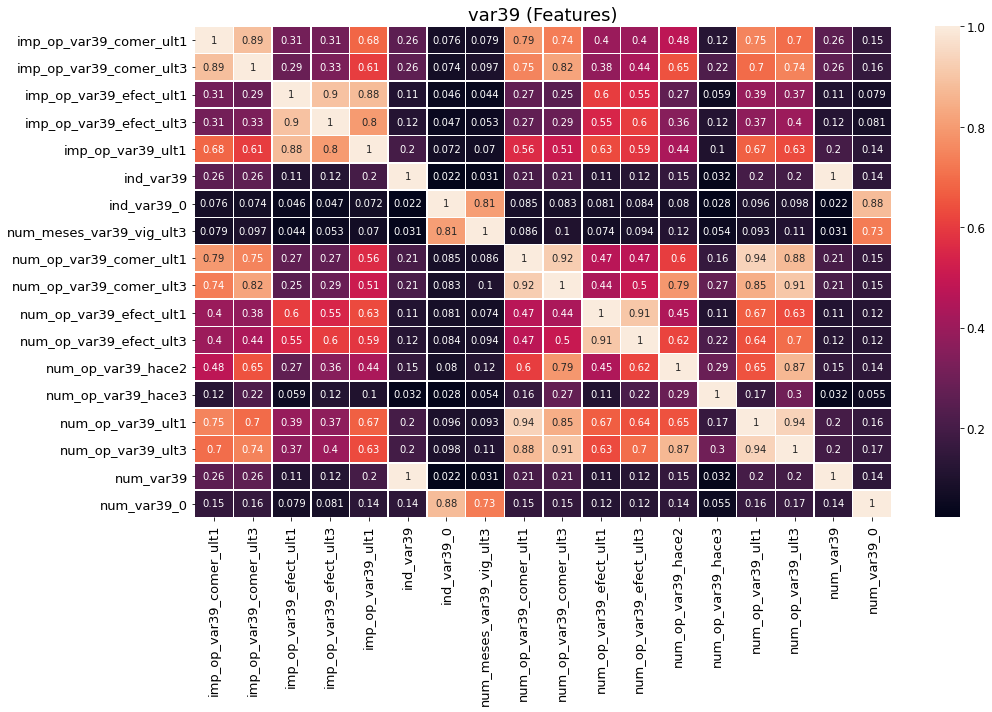

In [12]:
# Analisando a correlação entre as features relacionadas a "var39":
ptlib.plot_corr_features(df=train_df, features=feat_groupby_vars['var39'], digits=3, title="var39 (Features)",
                         title_fontsize=18, xtick_labelsize=13, ytick_labelsize=13, width=15, height=10,
                         figure_id='plot_corr_features_var39', figure_path=PROJECT_IMG_PATH,
                         figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                        )

**Análise:** Observando a **correlação entre as features** (**plot acima**) concluímos que:

1. **`ind_var39 x num_var39`** são **colineares**, pois representam a mesma informação (**`correlação = 1.0`**);

2. Temos **`09 pares`** que possuem uma **alta correlação positiva** (**`0.70 <= correlação <= 0.79`**);

3. Temos **`09 pares`** que possuem uma **alta correlação positiva** (**`0.80 <= correlação <= 0.89`**);

4. Temos **`06 pares`** que possuem uma **alta correlação positiva** (**`0.90 <= correlação <= 0.99`**);

5. Temos **`muitos pares`** que **não possuem correlação** (**`0.0 <= correlação <= 0.19`**).

Agora, para a feature **`num_meses_var39_vig_ult3`**, vamos analisar as suas categorias em um *gráfico de barras*:

Saving figure: plot_count_num_meses_var39_vig_ult3


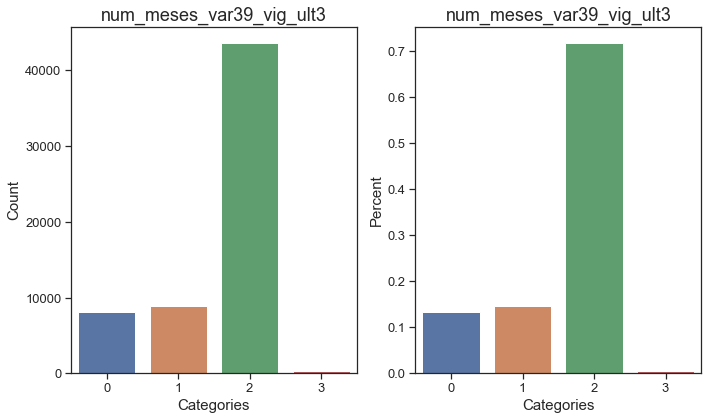

,num_meses_var39_vig_ult3,Total,Percent
0,0,8135,0.1338
1,1,8829,0.1452
2,2,43580,0.7166
3,3,272,0.0045


In [13]:
# Agora, vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(df=train_df, feature='num_meses_var39_vig_ult3', plot_style='ticks',
                                 title='num_meses_var39_vig_ult3', title_fontsize=18, title_share=False,
                                 xlabel1="Categories", xlabel1_fontsize=15, xlabel2="Categories", xlabel2_fontsize=15,
                                 ylabel_fontsize=15, columns_nr=2, rows_nr=1, share_x=False, share_y=False,
                                 width=10, height=6, xtick_labelsize=13, ytick_labelsize=13, wspace=None, hspace=None,
                                 figure_id='plot_count_num_meses_var39_vig_ult3', figure_path=PROJECT_IMG_PATH,
                                 figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                )

**Conclusão:** Portanto, entendemos que apenas a **`feature`** **`num_meses_var39_vig_ult3`**, relacionada a variável **`var39`**, é **`relevante`**, ou seja, **deverá ser analisada** na criação dos modelos preditivos.

In [14]:
# Armazenando informações sobre as features:

# Categórica Nominal Binária:
features = ['ind_var39', 'ind_var39_0']
santander_feat_info.save(key='Binary', features=features)

# Categórica Nominal:
santander_feat_info.save(key='Categorical', features=['num_meses_var39_vig_ult3'])

# Quantitativa Discreta:
features = ['num_op_var39_comer_ult1', 'num_op_var39_comer_ult3', 'num_op_var39_efect_ult1',
            'num_op_var39_efect_ult3', 'num_op_var39_hace2', 'num_op_var39_hace3', 'num_op_var39_ult1',
            'num_op_var39_ult3', 'num_var39', 'num_var39_0']
santander_feat_info.save(key='Discrete', features=features)

# Quantitativa Contínua:
features = ['imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3',
            'imp_op_var39_ult1']
santander_feat_info.save(key='Continuous', features=features)

# Features Irrelevantes:
features = ['imp_op_var39_comer_ult1','imp_op_var39_comer_ult3','imp_op_var39_efect_ult1','imp_op_var39_efect_ult3',
'imp_op_var39_ult1','ind_var39','ind_var39_0','num_op_var39_comer_ult1','num_op_var39_comer_ult3',
'num_op_var39_efect_ult1','num_op_var39_efect_ult3','num_op_var39_hace2','num_op_var39_hace3',
'num_op_var39_ult1','num_op_var39_ult3','num_var39','num_var39_0']
santander_feat_info.save(key='Irrelevant', features=features)

## var40

In [15]:
# Resumo das informações:
train_df[feat_groupby_vars['var40']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 18 columns):
imp_op_var40_comer_ult1    60816 non-null float64
imp_op_var40_comer_ult3    60816 non-null float64
imp_op_var40_efect_ult1    60816 non-null float64
imp_op_var40_efect_ult3    60816 non-null float64
imp_op_var40_ult1          60816 non-null float64
ind_var40                  60816 non-null int64
ind_var40_0                60816 non-null int64
num_op_var40_comer_ult1    60816 non-null int64
num_op_var40_comer_ult3    60816 non-null int64
num_op_var40_efect_ult1    60816 non-null int64
num_op_var40_efect_ult3    60816 non-null int64
num_op_var40_hace2         60816 non-null int64
num_op_var40_hace3         60816 non-null int64
num_op_var40_ult1          60816 non-null int64
num_op_var40_ult3          60816 non-null int64
num_var40                  60816 non-null int64
num_var40_0                60816 non-null int64
saldo_var40                60816 non-null float64
dtypes: float64

Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [16]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var40']].describe().T

,count,mean,std,min,25%,50%,75%,max
imp_op_var40_comer_ult1,60816.0,3.164183,86.245545,0.0,0.0,0.0,0.0,8237.82
imp_op_var40_comer_ult3,60816.0,5.748708,142.173207,0.0,0.0,0.0,0.0,10351.95
imp_op_var40_efect_ult1,60816.0,0.406672,32.490295,0.0,0.0,0.0,0.0,6600.00
imp_op_var40_efect_ult3,60816.0,0.566005,38.812040,0.0,0.0,0.0,0.0,6600.00
imp_op_var40_ult1,60816.0,2.919893,92.048327,0.0,0.0,0.0,0.0,8237.82
ind_var40,60816.0,0.003535,0.059353,0.0,0.0,0.0,0.0,1.00
ind_var40_0,60816.0,0.011083,0.104690,0.0,0.0,0.0,0.0,1.00
num_op_var40_comer_ult1,60816.0,0.067778,2.060719,0.0,0.0,0.0,0.0,210.00
num_op_var40_comer_ult3,60816.0,0.126233,4.093252,0.0,0.0,0.0,0.0,582.00
num_op_var40_efect_ult1,60816.0,0.002220,0.138151,0.0,0.0,0.0,0.0,24.00


In [17]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var40'], percent_range=range(95, 101, 1))
result.T

Percentile,95%,96%,97%,98%,99%,100%
imp_op_var40_comer_ult1,0.0,0.0,0.0,0.0,0.0,8237.82
imp_op_var40_comer_ult3,0.0,0.0,0.0,0.0,0.0,10351.95
imp_op_var40_efect_ult1,0.0,0.0,0.0,0.0,0.0,6600.00
imp_op_var40_efect_ult3,0.0,0.0,0.0,0.0,0.0,6600.00
imp_op_var40_ult1,0.0,0.0,0.0,0.0,0.0,8237.82
ind_var40,0.0,0.0,0.0,0.0,0.0,1.00
ind_var40_0,0.0,0.0,0.0,0.0,1.0,1.00
num_op_var40_comer_ult1,0.0,0.0,0.0,0.0,0.0,210.00
num_op_var40_comer_ult3,0.0,0.0,0.0,0.0,0.0,582.00
num_op_var40_efect_ult1,0.0,0.0,0.0,0.0,0.0,24.00


In [18]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var40":
for feat in feat_groupby_vars['var40']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                         Total  Percent
imp_op_var40_comer_ult1                
0.00                     60596   0.9964
180.00                       2   0.0000
30.00                        2   0.0000
948.00                       1   0.0000
805.47                       1   0.0000
...                        ...      ...
299.88                       1   0.0000
315.33                       1   0.0000
327.00                       1   0.0000
332.28                       1   0.0000
8237.82                      1   0.0000

[219 rows x 2 columns]

                         Total  Percent
imp_op_var40_comer_ult3                
0.00                     60552   0.9957
30.00                        3   0.0000
4.50                         2   0.0000
1144.20                      1   0.0000
1169.04                      1   0.0000
...                        ...      ...
499.20                       1   0.0000
501.12                       1   0.0000
521.40                       1   0.0000
535.32         

             Total  Percent
saldo_var40                
0.00         60601   0.9965
4035.00          2   0.0000
1470.60          1   0.0000
1102.65          1   0.0000
979.95           1   0.0000
...            ...      ...
384.66           1   0.0000
396.00           1   0.0000
400.83           1   0.0000
404.34           1   0.0000
8192.61          1   0.0000

[215 rows x 2 columns]



**Análise:**

1. As features **`ind_var40`** e **`ind_var40_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas classes **`0`** e **`1`**;

2. As features **`num_op_var40_comer_ult1`**, **`num_op_var40_comer_ult3`**, **`num_op_var40_efect_ult1`**, **`num_op_var40_efect_ult3`**, **`num_op_var40_hace2`**, **`num_op_var40_hace3`**, **`num_op_var40_ult1`**, **`num_op_var40_ult3`**, **`num_var40`** e **`num_var40_0`** são variáveis do tipo `Quantitativas Discretas`;

3. As features **`imp_op_var40_comer_ult1`**, **`imp_op_var40_comer_ult3`**, **`imp_op_var40_efect_ult1`**, **`imp_op_var40_efect_ult3`**, **`imp_op_var40_ult1`** e **`saldo_var40`** são variáveis do tipo `Quantitativas Contínuas`;


Conforme mostrado nos relatórios de *proporções* e *percentis* temos:

1. Para as features **`ind_var40`** e **`ind_var40_0`**, observamos que **`99.99%`** das observações pertencem a classe **`0`**;

2. Para as demais features, observamos que **`99.99%`** das observações possuem valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [19]:
# Armazenando informações sobre as features:

# Categórica Nominal Binária.
features = ['ind_var40', 'ind_var40_0']
santander_feat_info.save(key='Binary', features=features)

# Quantitativa Discreta.
features = ['num_op_var40_comer_ult1', 'num_op_var40_comer_ult3', 'num_op_var40_efect_ult1',
            'num_op_var40_efect_ult3', 'num_op_var40_hace2', 'num_op_var40_hace3', 'num_op_var40_ult1',
            'num_op_var40_ult3', 'num_var40', 'num_var40_0']
santander_feat_info.save(key='Discrete', features=features)

# Quantitativa Contínua.
features = ['imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3',
            'imp_op_var40_ult1', 'saldo_var40']
santander_feat_info.save(key='Continuous', features=features)

# Todas as features são Irrelevantes:
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var40'])

## var41

In [20]:
# Resumo das informações:
train_df[feat_groupby_vars['var41']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 18 columns):
imp_op_var41_comer_ult1    60816 non-null float64
imp_op_var41_comer_ult3    60816 non-null float64
imp_op_var41_efect_ult1    60816 non-null float64
imp_op_var41_efect_ult3    60816 non-null float64
imp_op_var41_ult1          60816 non-null float64
ind_var41                  60816 non-null int64
ind_var41_0                60816 non-null int64
num_op_var41_comer_ult1    60816 non-null int64
num_op_var41_comer_ult3    60816 non-null int64
num_op_var41_efect_ult1    60816 non-null int64
num_op_var41_efect_ult3    60816 non-null int64
num_op_var41_hace2         60816 non-null int64
num_op_var41_hace3         60816 non-null int64
num_op_var41_ult1          60816 non-null int64
num_op_var41_ult3          60816 non-null int64
num_var41                  60816 non-null int64
num_var41_0                60816 non-null int64
saldo_var41                60816 non-null int64
dtypes: float64(5

Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [21]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var41']].describe().T

,count,mean,std,min,25%,50%,75%,max
imp_op_var41_comer_ult1,60816.0,69.021124,320.203951,0.0,0.0,0.0,0.0,9177.18
imp_op_var41_comer_ult3,60816.0,113.420328,514.898002,0.0,0.0,0.0,0.0,16086.06
imp_op_var41_efect_ult1,60816.0,67.706449,526.841213,0.0,0.0,0.0,0.0,45990.00
imp_op_var41_efect_ult3,60816.0,111.796809,849.182252,0.0,0.0,0.0,0.0,96870.00
imp_op_var41_ult1,60816.0,137.324003,700.709527,0.0,0.0,0.0,0.0,47598.09
ind_var41,60816.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
ind_var41_0,60816.0,0.879226,0.325867,0.0,1.0,1.0,1.0,1.00
num_op_var41_comer_ult1,60816.0,2.131166,8.908613,0.0,0.0,0.0,0.0,438.00
num_op_var41_comer_ult3,60816.0,3.482340,14.300298,0.0,0.0,0.0,0.0,438.00
num_op_var41_efect_ult1,60816.0,0.720649,3.227072,0.0,0.0,0.0,0.0,90.00


In [22]:
# Obtendo os percentis a partir de "76%", com intervá-los de "2%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var41'], percent_range=range(76, 101, 2))
result.T

Percentile,76%,78%,80%,82%,84%,86%,88%,90%,92%,94%,96%,98%,100%
imp_op_var41_comer_ult1,0.0,0.0,0.0,0.0,0.0,0.000,21.30,73.965,162.882,311.475,555.576,1009.068,9177.18
imp_op_var41_comer_ult3,0.0,0.0,0.0,0.0,0.0,28.350,75.75,159.690,304.788,531.921,894.930,1592.709,16086.06
imp_op_var41_efect_ult1,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,60.000,180.000,420.000,960.000,45990.00
imp_op_var41_efect_ult3,0.0,0.0,0.0,0.0,0.0,0.000,0.00,60.000,150.000,360.000,750.000,1500.000,96870.00
imp_op_var41_ult1,0.0,0.0,0.0,0.0,0.0,37.857,98.22,210.000,391.728,660.000,1075.728,1828.434,47598.09
ind_var41,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00
ind_var41_0,1.0,1.0,1.0,1.0,1.0,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.00
num_op_var41_comer_ult1,0.0,0.0,0.0,0.0,0.0,0.000,3.00,3.000,6.000,12.000,18.000,30.000,438.00
num_op_var41_comer_ult3,0.0,0.0,0.0,0.0,0.0,3.000,3.00,6.000,12.000,18.000,27.000,48.000,438.00
num_op_var41_efect_ult1,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.000,3.000,3.000,6.000,12.000,90.00


In [23]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var41":
for feat in feat_groupby_vars['var41']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                         Total  Percent
imp_op_var41_comer_ult1                
0.00                     52991   0.8713
30.00                      100   0.0016
60.00                       81   0.0013
15.00                       46   0.0008
90.00                       33   0.0005
...                        ...      ...
268.65                       1   0.0000
268.20                       1   0.0000
268.17                       1   0.0000
268.14                       1   0.0000
9177.18                      1   0.0000

[6114 rows x 2 columns]

                         Total  Percent
imp_op_var41_comer_ult3                
0.00                     51591   0.8483
30.00                      141   0.0023
60.00                       69   0.0011
4.50                        58   0.0010
15.00                       48   0.0008
...                        ...      ...
315.27                       1   0.0000
314.91                       1   0.0000
314.85                       1   0.0000
314.73        

                    Total  Percent
num_op_var41_hace3                
0                   60026   0.9870
3                     414   0.0068
6                     156   0.0026
9                      87   0.0014
12                     44   0.0007
15                     28   0.0005
18                     15   0.0002
21                     15   0.0002
30                      7   0.0001
24                      5   0.0001
33                      5   0.0001
27                      4   0.0001
39                      2   0.0000
48                      2   0.0000
36                      1   0.0000
42                      1   0.0000
57                      1   0.0000
66                      1   0.0000
69                      1   0.0000
81                      1   0.0000

                   Total  Percent
num_op_var41_ult1                
0                  51525   0.8472
3                   2325   0.0382
6                   1403   0.0231
9                    860   0.0141
12                   649 

**Análise:**

1. As features **`ind_var41`** e **`ind_var41_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas classes **`0`** e **`1`**;

2. As features **`num_op_var41_comer_ult1`**, **`num_op_var41_comer_ult3`**, **`num_op_var41_efect_ult1`**, **`num_op_var41_efect_ult3`**, **`num_op_var41_hace2`**, **`num_op_var41_hace3`**, **`num_op_var41_ult1`**, **`num_op_var41_ult3`**, **`num_var41`** e **`num_var41_0`** são variáveis do tipo `Quantitativas Discretas`;

3. As features **`imp_op_var41_comer_ult1`**, **`imp_op_var41_comer_ult3`**, **`imp_op_var41_efect_ult1`**, **`imp_op_var41_efect_ult3`**, **`imp_op_var41_ult1`** e **`saldo_var41`** são variáveis do tipo `Quantitativas Contínuas`;


Conforme mostrado nos relatórios de *proporções* e *percentis* temos:

1. Para a feature **`ind_var41`**, observamos que **`100%`** das observações pertencem a classe **`0`**;

2. Para a feature **`ind_var41_0`**, observamos que **`88%`** das observações pertencem a classe **`1`**;

3. Para a feature **`num_op_var41_comer_ult1`**, observamos que **`87%`** das observações possuem valores iguais a **`0`**;

4. Para a feature **`num_op_var41_comer_ult3`**, observamos que **`85%`** das observações possuem valores iguais a **`0`**;

5. Para a feature **`num_op_var41_efect_ult1`**, observamos que **`91%`** das observações possuem valores iguais a **`0`**;

6. Para a feature **`num_op_var41_efect_ult3`**, observamos que **`89%`** das observações possuem valores iguais a **`0`**;

7. Para a feature **`num_op_var41_hace2`**, observamos que **`89%`** das observações possuem valores iguais a **`0`**;

8. Para a feature **`num_op_var41_hace3`**, observamos que **`99%`** das observações possuem valores iguais a **`0`**;

9. Para a feature **`num_op_var41_ult1`**, observamos que **`85%`** das observações possuem valores iguais a **`0`**;

10. Para a feature **`num_op_var41_ult3`**, observamos que **`82%`** das observações possuem valores iguais a **`0`**;

11. Para a feature **`num_var41`**, observamos que **`100%`** das observações possuem valores iguais a **`0`**;

12. Para a feature **`num_var41_0`**, observamos que **`86%`** das observações possuem valores iguais a **`3`**;

13. Para a feature **`imp_op_var41_comer_ult1`**, observamos que **`87%`** das observações possuem valores iguais a **`0`**;

14. Para a feature **`imp_op_var41_comer_ult3`**, observamos que **`85%`** das observações possuem valores iguais a **`0`**;

15. Para a feature **`imp_op_var41_efect_ult1`**, observamos que **`91%`** das observações possuem valores iguais a **`0`**;

16. Para a feature **`imp_op_var41_efect_ult3`**, observamos que **`89%`** das observações possuem valores iguais a **`0`**;

17. Para a feature **`imp_op_var41_ult1`**, observamos que **`85%`** das observações possuem valores iguais a **`0`**;

18. Para a feature **`saldo_var41`**, observamos que **`100%`** das observações possuem valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [24]:
# Armazenando informações sobre as features:

# Categórica Nominal Binária:
features = ['ind_var41', 'ind_var41_0']
santander_feat_info.save(key='Binary', features=features)

# Quantitativa Discreta:
features = ['num_op_var41_comer_ult1', 'num_op_var41_comer_ult3', 'num_op_var41_efect_ult1',
            'num_op_var41_efect_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1',
            'num_op_var41_ult3', 'num_var41', 'num_var41_0']
santander_feat_info.save(key='Discrete', features=features)

# Quantitativa Contínua:
features = ['imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3',
            'imp_op_var41_ult1', 'saldo_var41']
santander_feat_info.save(key='Continuous', features=features)

# Features Irrelevantes:
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var41'])

In [25]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 232


## Variáveis que possuem `22 features` em nosso dataset:

In [26]:
# Verificando as variáveis que possuem "22" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_22']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 1
['var44']


In [27]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 22


## var44

In [28]:
# Resumo das informações:
train_df[feat_groupby_vars['var44']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 22 columns):
delta_imp_compra_var44_1y3    60816 non-null float64
delta_imp_venta_var44_1y3     60816 non-null float64
delta_num_compra_var44_1y3    60816 non-null float64
delta_num_venta_var44_1y3     60816 non-null float64
imp_compra_var44_hace3        60816 non-null float64
imp_compra_var44_ult1         60816 non-null float64
imp_venta_var44_hace3         60816 non-null float64
imp_venta_var44_ult1          60816 non-null float64
ind_var44                     60816 non-null int64
ind_var44_0                   60816 non-null int64
num_compra_var44_hace3        60816 non-null int64
num_compra_var44_ult1         60816 non-null int64
num_meses_var44_ult3          60816 non-null int64
num_var44                     60816 non-null int64
num_var44_0                   60816 non-null int64
num_venta_var44_hace3         60816 non-null int64
num_venta_var44_ult1          60816 non-null int64
saldo_me

Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [29]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var44']].describe().T

,count,mean,std,min,25%,50%,75%,max
delta_imp_compra_var44_1y3,60816.0,9.701394e+06,3.113221e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_imp_venta_var44_1y3,60816.0,6.248356e+06,2.498911e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_num_compra_var44_1y3,60816.0,9.701394e+06,3.113221e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_num_venta_var44_1y3,60816.0,6.248356e+06,2.498911e+08,-1.0,0.0,0.0,0.0,1.000000e+10
imp_compra_var44_hace3,60816.0,1.188168e+01,9.367715e+02,0.0,0.0,0.0,0.0,1.288745e+05
imp_compra_var44_ult1,60816.0,1.416635e+02,1.522183e+04,0.0,0.0,0.0,0.0,3.410059e+06
imp_venta_var44_hace3,60816.0,1.283605e+00,3.164548e+02,0.0,0.0,0.0,0.0,7.804059e+04
imp_venta_var44_ult1,60816.0,9.881891e+01,1.260544e+04,0.0,0.0,0.0,0.0,2.754476e+06
ind_var44,60816.0,1.726519e-03,4.151586e-02,0.0,0.0,0.0,0.0,1.000000e+00
ind_var44_0,60816.0,1.907393e-03,4.363240e-02,0.0,0.0,0.0,0.0,1.000000e+00


In [30]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var44'], percent_range=range(95, 101, 1))
result.T

Percentile,95%,96%,97%,98%,99%,100%
delta_imp_compra_var44_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_venta_var44_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_compra_var44_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
delta_num_venta_var44_1y3,0.0,0.0,0.0,0.0,0.0,1.000000e+10
imp_compra_var44_hace3,0.0,0.0,0.0,0.0,0.0,1.288745e+05
imp_compra_var44_ult1,0.0,0.0,0.0,0.0,0.0,3.410059e+06
imp_venta_var44_hace3,0.0,0.0,0.0,0.0,0.0,7.804059e+04
imp_venta_var44_ult1,0.0,0.0,0.0,0.0,0.0,2.754476e+06
ind_var44,0.0,0.0,0.0,0.0,0.0,1.000000e+00
ind_var44_0,0.0,0.0,0.0,0.0,0.0,1.000000e+00


In [31]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var44":
for feat in feat_groupby_vars['var44']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                            Total  Percent
delta_imp_compra_var44_1y3                
 0.000000e+00               60734   0.9987
 1.000000e+10                  59   0.0010
-1.000000e+00                  11   0.0002
-9.787923e-01                   1   0.0000
-9.684806e-01                   1   0.0000
-9.503975e-01                   1   0.0000
-9.340305e-01                   1   0.0000
-6.307265e-01                   1   0.0000
 2.562323e-02                   1   0.0000
 1.517507e-01                   1   0.0000
 3.336069e-01                   1   0.0000
 1.886204e+00                   1   0.0000
 2.650549e+00                   1   0.0000
 3.654278e+00                   1   0.0000
 6.267608e+00                   1   0.0000

                           Total  Percent
delta_imp_venta_var44_1y3                
 0.000000e+00              60776   0.9993
 1.000000e+10                 38   0.0006
-1.000000e+00                  1   0.0000
 5.417098e+00                  1   0.0000

               

**Análise:**

1. As features **`ind_var44`** e **`ind_var44_0`** são variáveis do tipo `Categóricas Nominais Binárias`, ou seja, com apenas duas classes **`0`** e **`1`**;

2. A feature **`num_meses_var44_ult3`** é uma variáve do tipo `Categórica Nominal`, com quatro categorias **`0`**, **`1`**, **`2`** e **`3`**;

3. As features **`num_compra_var44_hace3`**, **`num_compra_var44_ult1`**, **`num_var44`**, **`num_var44_0`**, **`num_venta_var44_hace3`** e **`num_venta_var44_ult1`** são variáveis do tipo `Quantitativas Discretas`;

4. As features **`delta_imp_compra_var44_1y3`**, **`delta_imp_venta_var44_1y3`**, **`delta_num_compra_var44_1y3`**, **`delta_num_venta_var44_1y3`**, **`imp_compra_var44_hace3`**, **`imp_compra_var44_ult1`**, **`imp_venta_var44_hace3`**, **`imp_venta_var44_ult1`**, **`saldo_medio_var44_hace2`**, **`saldo_medio_var44_hace3`**, **`saldo_medio_var44_ult1`**, **`saldo_medio_var44_ult3`** e **`saldo_var44`** são variáveis do tipo `Quantitativas Contínuas`;


Conforme mostrado nos relatórios de *proporções* e *percentis* temos:

1. Para as features **`ind_var44`** e **`ind_var44_0`**, observamos que **`99%`** das observações pertencem a categoria **`0`**;

2. Para a feature **`num_meses_var44_ult3`**, observamos que **`99.81%`** das observações pertencem a categoria **`0`**;

3. Para as demais features, observamos que **`99%`** das observações possuem valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [32]:
# Armazenando informações sobre as features:

# Categórica Nominal Binária:
features = ['ind_var44', 'ind_var44_0']
santander_feat_info.save(key='Binary', features=features)

# Categórica Nominal:
santander_feat_info.save(key='Categorical', features=['num_meses_var44_ult3'])

# Quantitativa Discreta:
features = ['num_compra_var44_hace3', 'num_compra_var44_ult1', 'num_var44', 'num_var44_0',
            'num_venta_var44_hace3', 'num_venta_var44_ult1']
santander_feat_info.save(key='Discrete', features=features)

# Quantitativa Contínua:
features = ['delta_imp_compra_var44_1y3', 'delta_imp_venta_var44_1y3', 'delta_num_compra_var44_1y3',
            'delta_num_venta_var44_1y3', 'imp_compra_var44_hace3', 'imp_compra_var44_ult1',
            'imp_venta_var44_hace3', 'imp_venta_var44_ult1', 'saldo_medio_var44_hace2',
            'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'saldo_var44']
santander_feat_info.save(key='Continuous', features=features)

# Features Irrelevantes:
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var44'])

In [33]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 254


## 04- Salvando informações (`objetos`) importantes, encontradas nesta etapa:

Agora, vamos salvar os seguintes `objetos` importantes, que serão utilizados nas próximas etapas, saber:

1. **`feat_groupby_vars`:** dicionário com as features agrupadas por tipo de variável (var1, var2, var18, etc...);

2. **`vars_groupby_featcount`:** dicionário com as variáveis (var1, var2, var18, etc...) agrupadas por quantidade (contagem) de features (Feat_1, Feat_2, Feat_3, etc...);

3. **`santander_feat_info`:** dicionário com as principais informações sobre cada uma das features, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`) e uma lista das variáveis que não são importantes para a criação dos modelos preditivos (`Drop`).

In [34]:
# Salvando o objeto "feat_groupby_vars":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="feat_groupby_vars.pickle", object_name=feat_groupby_vars,
                          msg="The 'feat_groupby_vars' object has been successfully saved!")

# Salvando o objeto "vars_groupby_featcount":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="vars_groupby_featcount.pickle", object_name=vars_groupby_featcount,
                          msg="The 'vars_groupby_featcount' object has been successfully saved!")

# Salvando o objeto "santander_feat_info":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="santander_feat_info.pickle", object_name=santander_feat_info,
                          msg="The 'santander_feat_info' object has been successfully saved!")

The 'feat_groupby_vars' object has been successfully saved!
The 'vars_groupby_featcount' object has been successfully saved!
The 'santander_feat_info' object has been successfully saved!


## <font color='black'>FIM</font>